In [2]:
# make sure that rpy2 is installed: https://rpy2.bitbucket.io/
%load_ext rpy2.ipython

import warnings
from rpy2.rinterface import RRuntimeWarning
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

# ignore R warning messages
warnings.filterwarnings("ignore", category=RRuntimeWarning)
import anndata

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
%%R -o N1_DAT -o N2_DAT -o N3_DAT -o cellinfo_N1 -o cellinfo_N2 -o cellinfo_N3 -o geneinfo_N1 -o geneinfo_N2 -o geneinfo_N3 -o N_DAT -o cellinfo -o geneinfo

load('/home/wenhao/RAW_REAL/RAW_REAL/RAW_TUNG.RData')

cellinfo_N1<-data.frame(Cell=colnames(N1_DAT))
cellinfo_N2<-data.frame(Cell=colnames(N2_DAT))
cellinfo_N3<-data.frame(Cell=colnames(N3_DAT))

geneinfo_N1<-data.frame(Gene=rownames(N1_DAT))
geneinfo_N2<-data.frame(Gene=rownames(N2_DAT))
geneinfo_N3<-data.frame(Gene=rownames(N3_DAT))

N1_DAT<-as.data.frame(t(N1_DAT))
N2_DAT<-as.data.frame(t(N2_DAT))
N3_DAT<-as.data.frame(t(N3_DAT))

N_DAT<-rbind(N1_DAT,N2_DAT,N3_DAT)
cellinfo<-rbind(cellinfo_N1,cellinfo_N2,cellinfo_N3)
geneinfo<-geneinfo_N1




In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.api as sc
import DCA.api as dca

Using TensorFlow backend.


In [87]:
N_DAT.shape
cellinfo.shape

(564, 1)

In [7]:

adata_N1 = sc.AnnData(N1_DAT.values,var=geneinfo_N1,obs=cellinfo_N1)
adata_N1.var_names = geneinfo_N1.Gene
adata_N1.obs_names = cellinfo_N1.Cell
adata_N1

adata_N2 = sc.AnnData(N2_DAT.values,var=geneinfo_N2,obs=cellinfo_N2)
adata_N2.var_names = geneinfo_N2.Gene
adata_N2.obs_names = cellinfo_N2.Cell
adata_N2

adata_N3 = sc.AnnData(N3_DAT.values,var=geneinfo_N3,obs=cellinfo_N3)
adata_N3.var_names = geneinfo_N3.Gene
adata_N3.obs_names = cellinfo_N3.Cell
adata_N3

adata = sc.AnnData(N_DAT.values,var=geneinfo,obs=cellinfo)
adata.var_names = geneinfo.Gene
adata.obs_names = cellinfo.Cell
adata
# type(counts)
# cellinfo
type(adata_N1)
type(adata_N2)
type(adata_N3)

anndata.base.AnnData

In [9]:
%%time

# res_N1 = dca.autoencode(adata_N1, training_kwargs={'verbose': False})
# res_N2 = dca.autoencode(adata_N2, training_kwargs={'verbose': False})
# res_N3 = dca.autoencode(adata_N3, training_kwargs={'verbose': False})
res_N = dca.autoencode(adata, training_kwargs={'verbose': False})

### Autoencoder: Successfully preprocessed 13058 genes and 564 cells.
Calculating low dimensional representations...
Calculating reconstructions...
CPU times: user 14min 47s, sys: 7min 6s, total: 21min 54s
Wall time: 3min 43s


In [18]:
#type(res_N1)
# N1= res_N1.obsm['X_dca']
# N2= res_N2.obsm['X_dca']
# N3= res_N3.obsm['X_dca']

# nr,nc = N1.shape
# Br = ro.r.matrix(N1, nrow=nr, ncol=nc)
# ro.r.assign("N1", Br)


# nr,nc = N2.shape
# Br = ro.r.matrix(N2, nrow=nr, ncol=nc)
# ro.r.assign("N2", Br)

# nr,nc = N3.shape
# Br = ro.r.matrix(N3, nrow=nr, ncol=nc)
# ro.r.assign("N3", Br)


NN= res_N.obsm['X_dca']
nr,nc = NN.shape
Br = ro.r.matrix(NN, nrow=nr, ncol=nc)
ro.r.assign("NNN", Br)
NN.shape
#np.save("/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN1.npy",N1)

# np.savetxt('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN1.csv', res_N1.obsm['X_dca'], delimiter=",")
# np.savetxt('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN2.csv', res_N2.obsm['X_dca'], delimiter=",")
# np.savetxt('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN3.csv', res_N3.obsm['X_dca'], delimiter=",")

(564, 13058)

In [19]:
%%R
DCA_tungall<-t(NNN)
rownames(DCA_tungall)<-geneinfo_N1[,1]
colnames(DCA_tungall)<-cellinfo[,1]
save(DCA_tungall,file='/home/wenhao/RAW_REAL/DCA_norm/DCA_Tungall.RData')

In [59]:
%%R
N1<-t(N1)
N2<-t(N2)
N3<-t(N3)
rownames(N1)<-geneinfo_N1[,1]
colnames(N1)<-cellinfo_N1[,1]

rownames(N2)<-geneinfo_N2[,1]
colnames(N2)<-cellinfo_N2[,1]

rownames(N3)<-geneinfo_N3[,1]
colnames(N3)<-cellinfo_N3[,1]

save(N1,file='/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN1.RData')
save(N2,file='/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN2.RData')
save(N3,file='/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN3.RData')


Error in dimnames(x) <- dn : 
  length of 'dimnames' [1] not equal to array extent


In [64]:
#res_N1
res_N2.obsm['X_dca'].shape


# res_N1.write_csvs('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN1.csv')
# res_N2.write_csvs('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN2.csv')
# res_N3.write_csvs('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN3.csv')

# res_N1.write('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN1.h5ad')
# res_N2.write('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN2.h5ad')
# res_N3.write('/home/wenhao/RAW_REAL/DCA_norm/DCA_TungN3.h5ad')



(201, 13057)

In [24]:
adata_N1.X = res_N1.obsm['X_dca']
sc.pp.normalize_per_cell(adata_N1)
sc.pp.log1p(adata_N1)
sc.pp.pca(adata_N1)

adata_N1

AnnData object with n_obs × n_vars = 142 × 13048 
    obs: 'Cell', 'DCA_split', 'n_counts', 'size_factors'
    var: 'Gene', 'n_counts'
    uns: 'DCA_losses', 'pca'
    obsm: 'X_dca', 'X_dca_mean', 'X_dca_hidden', 'X_dca_dropout', 'X_dca_dispersion', 'X_pca'
    varm: 'PCs'

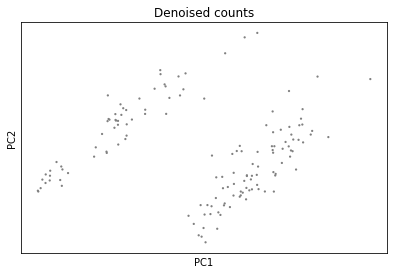

In [26]:
sc.pl.pca_scatter(adata_N1, size=20, title='Denoised counts')